## Table of Contents

1. [About LeetCode](#About-LeetCode)
2. [Disclaimer](#Disclaimer)
3. [Problem Description](#Problem-Description)
4. [Approach and Algorithm](#Approach-and-Algorithm)
5. [Code Implementation](#Code-Implementation)
6. [Big O Notation](#Big-O-Notation)

## 1. About LeetCode <a name="About-LeetCode"></a>


LeetCode is a popular online platform that provides a collection of coding interview questions and challenges. It is widely used by software engineers, developers, and students to practice and improve their algorithmic and coding skills.

LeetCode is a valuable resource for anyone looking to enhance their coding skills, prepare for coding interviews, or simply enjoy solving challenging problems. It can help you become more proficient in algorithms and data structures, improve problem-solving abilities, and gain confidence in coding interviews.

For more info about this platform, please check [the official website](https://leetcode.com/).




## 2. Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the problem stated in [LeetCode](https://leetcode.com/studyplan/leetcode-75/). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of LeetCode, and all rights are reserved by them.



## 3. Problem Description <a name="Problem-Description"></a>
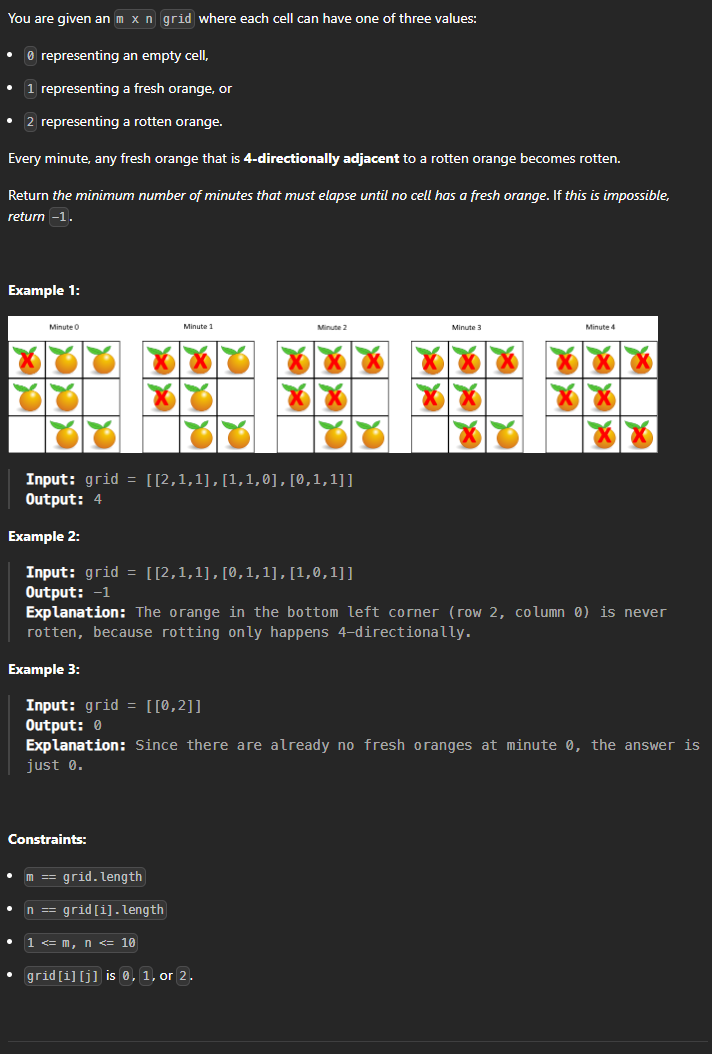

## 4. Approach and Algorithm <a name="Approach-and-Algorithm"></a>


1. Initialize a queue to store the coordinates of the rotten oranges.
2. Initialize variables `freshOranges` and `rottenOranges` to count the number of fresh and rotten oranges initially.
3. Iterate over the grid to find the initially rotten oranges:
   - Enqueue the coordinate of the rotten orange into the queue.
   - Increment `rottenOranges` by 1.
   - If the orange is fresh, increment `freshOranges` by 1.
4. Initialize a variable `minutes` to 0 to keep track of the number of minutes elapsed.
5. While the queue is not empty:
   - Increment `minutes` by 1 to indicate the passage of time.
   - Get the size of the queue (this will be the number of rotten oranges to process at the current minute).
   - Iterate through each rotten orange in the current minute:
     - Dequeue a rotten orange from the front of the queue.
     - Check the neighboring cells (up, down, left, right) of the current orange:
       - If a neighboring cell is a fresh orange, mark it as rotten:
         - Change its value to 2 in the grid.
         - Decrement `freshOranges` by 1.
         - Enqueue its coordinate into the queue.
   - If the number of rotten oranges processed in the current minute is greater than 0, continue to the next minute.
6. After the loop, check if there are any remaining fresh oranges:
   - If `freshOranges` is greater than 0, return -1 to indicate it's impossible to rot all the fresh oranges.
   - Otherwise, return `minutes` to indicate the number of minutes it took to rot all the oranges.






## 5. Code Implementation <a name="Code-Implementation"></a>


In [64]:
from collections import deque
class Solution(object):
    def orangesRotting(self, grid):
        m, n = len(grid), len(grid[0])
        queue = deque()
        freshOranges = 0
        rottenOranges = 0

        # Enqueue the initially rotten oranges and count fresh and rotten oranges
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 2:
                    queue.append((i, j))
                    rottenOranges += 1
                elif grid[i][j] == 1:
                    freshOranges += 1

        minutes = 0

        # Perform BFS
        while queue:
            level_size = len(queue)

            for _ in range(level_size):
                row, col = queue.popleft()

                for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                    new_row = row + dx
                    new_col = col + dy

                    if 0 <= new_row < m and 0 <= new_col < n and grid[new_row][new_col] == 1:
                        grid[new_row][new_col] = 2
                        freshOranges -= 1
                        queue.append((new_row, new_col))

            if len(queue) > 0:
                minutes += 1

        if freshOranges > 0:
            return -1
        else:
            return minutes

In [65]:
# Example 1
grid = [[2,1,1],[1,1,0],[0,1,1]]
result = Solution().orangesRotting(grid)
print(result)

4


In [66]:
# Example 2
grid = [[2,1,1],[0,1,1],[1,0,1]]
result = Solution().orangesRotting(grid)
print(result)

-1


In [67]:
# Example 3
grid = [[0,2]]
result = Solution().orangesRotting(grid)
print(result)

0


## 6. Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

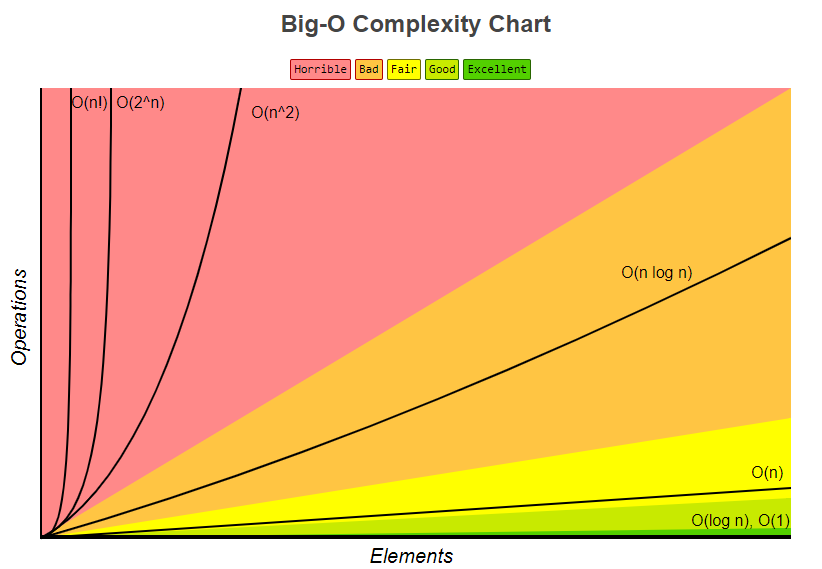


Time Complexity:

The time complexity depends on the size of the grid and the number of iterations required to process all the oranges. In the worst case, every cell can be visited, and each cell's neighbors are checked. Therefore, the time complexity is $O(m * n)$, where $m$ and $n$ are the dimensions of the grid.

Space Complexity:
The space complexity is determined by the space used to store the queue, the grid itself, and other variables. In the worst case, when all cells are fresh oranges and need to be processed, the maximum number of elements in the queue would be the total number of cells in the grid. Therefore, the space complexity is $O(m * n)$ to store the queue.